In [3]:
import mglearn # 머신모델의 시각화
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA # 주성분분석
from matplotlib.colors import ListedColormap # 그래프 색깔 설정
import matplotlib.pyplot as plt
import pandas as pd
import warnings # 경고메세지 무시하려고
warnings.filterwarnings("ignore") # 경고 메세지 나오는거 무시

In [10]:
df = pd.read_excel("./data/Raisin_Dataset.xlsx")

In [11]:
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [12]:
# 건포도요?

In [13]:
# 독립변수와 종속변수 분리할께
x = df.drop(["Area", "Class"], axis = 1)
y = df[["Class"]]

In [8]:
x.head()

,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,442.246011,253.291155,0.819738,90546,0.758651,1184.040
1,406.690687,243.032436,0.801805,78789,0.684130,1121.786
2,442.267048,266.328318,0.798354,93717,0.637613,1208.575
3,286.540559,208.760042,0.684989,47336,0.699599,844.162
4,352.190770,290.827533,0.564011,81463,0.792772,1073.251


In [19]:
# test 데이터가 포함되어 있으면 안되나 강의편의상 MinMaxScaler(0~1) 하는 것임

In [16]:
mm = MinMaxScaler()
df_minmax = mm.fit_transform(x)

In [17]:
# 컬럼명 결합
x = pd.DataFrame(data = df_minmax, columns = x.columns)

In [18]:
x.head()

,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,0.280714,0.314376,0.767872,0.255504,0.831422,0.271791
1,0.234638,0.284945,0.738636,0.208864,0.667854,0.241842
2,0.280741,0.351778,0.733009,0.268084,0.565754,0.283594
3,0.078935,0.186620,0.548194,0.084089,0.701809,0.108284
4,0.164011,0.422064,0.350968,0.219472,0.906315,0.218493


In [20]:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size = 0.3,
    stratify = y,
    random_state = 31
)

In [21]:
len(x_train), len(x_test)

(630, 270)

In [45]:
# 기본 KNN 모델 생성 및 적용
classifier = KNeighborsClassifier(n_neighbors = 5 , 
                                    weights = "uniform",
                                    metric = "minkowski")

classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [46]:
# KNN 모델 정확도 출력
print(classifier.score(x_train, y_train))
print(classifier.score(x_test, y_test))

0.8841269841269841
0.8555555555555555


# k 값 조정해가면서 모델 평가해보자

In [53]:
k_num = range(1, 30, 2) # 홀수넣으려고

accuracies = []

for k in k_num:
    k_num_model_1 = KNeighborsClassifier(n_neighbors=k)
    k_num_model_1.fit(x_train, y_train)
    accuracies.append( 1 - k_num_model_1.score(x_test,y_test))

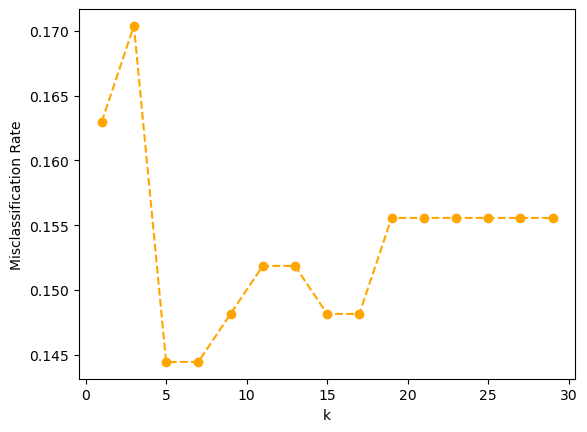

In [54]:
plt.plot(
    k_num, accuracies, "o--", color = "orange"
)
plt.xlabel("k")
plt.ylabel("Misclassification Rate")
plt.show()

- 성능이 5또는 7일때 성능이 가장 좋은것으로 보임

- 거리 가중치를 적용하지 않은 모델에서 k 이웃수를 1에서 30까지 늘려가며 KNN 모델의 오분류율을 시각화
- 이웃 수가 5개일 때 오분류율이 가장 낮아져서 k는 5일때 가장 적합함

# 거리로 따졌을때

In [55]:
 k_num = range(1, 30, 2) # 홀수넣으려고

accuracies = []

for k in k_num:
    k_num_model_2 = KNeighborsClassifier(n_neighbors=k, weights="distance")
    k_num_model_2.fit(x_train, y_train)
    accuracies.append( 1 - k_num_model_1.score(x_test,y_test))

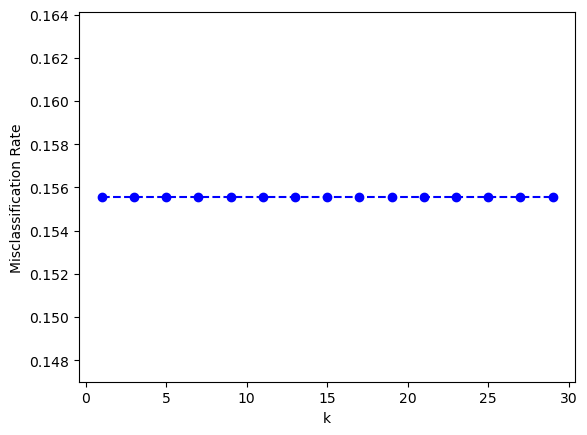

In [50]:
plt.plot(
    k_num, accuracies, "o--", color = "blue"
)
plt.xlabel("k")
plt.ylabel("Misclassification Rate")
plt.show()

- 5, 7, 12 k 군집할수있는 애들이 늘어나긴했는데 나중에 모델평가할때는 어떤 차이가 있는지 모르겠으니...
- 함 다 해봐라

In [51]:
 k_num = range(1, 30, 2) # 홀수넣으려고

accuracies = []

for k in k_num:
    k_num_model_3 = KNeighborsClassifier(n_neighbors=k, weights="uniform")
    k_num_model_3.fit(x_train, y_train)
    accuracies.append( 1 - k_num_model_1.score(x_test,y_test))

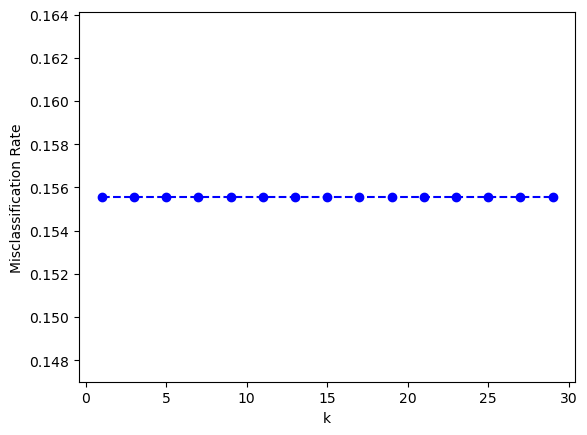

In [52]:
plt.plot(
    k_num, accuracies, "o--", color = "blue"
)
plt.xlabel("k")
plt.ylabel("Misclassification Rate")
plt.show()